# THỰC HÀNH 2: ẢNH KỸ THUẬT SỐ & MÀU

## 1 VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH


### 1.1 Biến đổi cường độ ảnh ( Image inverse transformation )

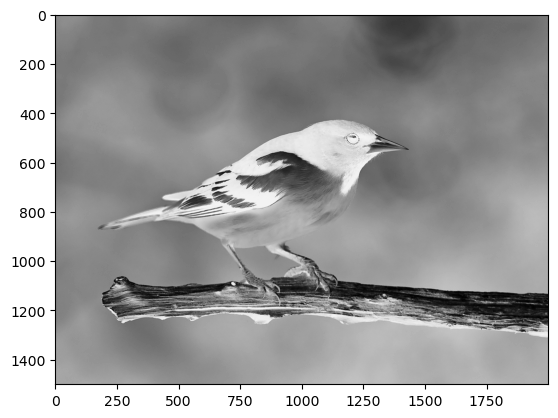

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

im_2 = 255 - im_1

new_img = Image.fromarray(im_2)

# img.show()

plt.imshow(new_img, cmap= 'gray')
plt.show()

### 1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Corection)

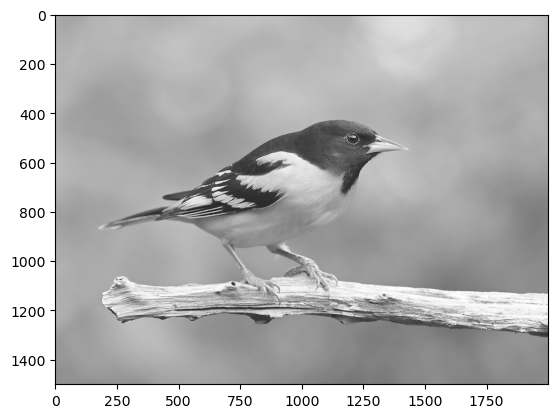

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

gamma = 0.5

b1 = im_1.astype(float)

b2 = np.max(b1)

b3 = (b1+1)/b2

b4 = np.log(b3) * gamma

c = np.exp(b4) * 255.0

c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

# img.show()
# d.show()
plt.imshow(d, cmap='gray')
plt.show()

### 1.3. Thay đổi cường độ điểm ảnh với Log Transformation

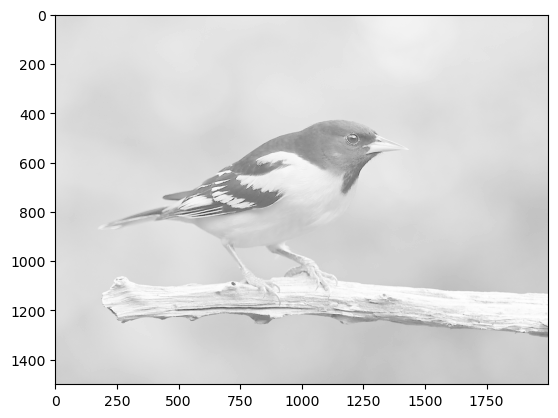

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.astype(float)

b2 = np.max(b1)

c = (128.0 * np.log(1+b1))/np.log(1+b2)

c1 = c.astype(np.uint8)
d = Image.fromarray(c1)

# img.show()
# d.show()
plt.imshow(d, cmap='gray')
plt.show()

### 1.4. Histogram equalization

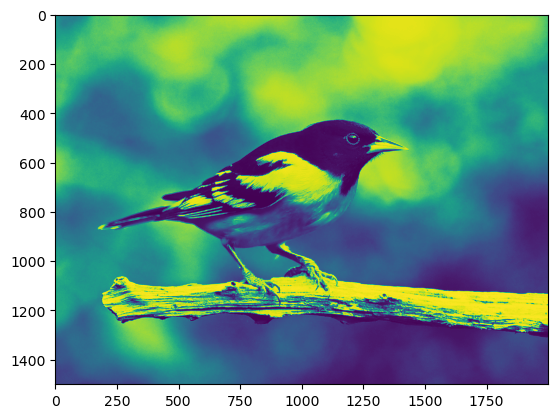

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
# img.show()
# im4.show()
plt.imshow(im4)
plt.show()

### 1.5. Thay đổi ảnh với contrast Stertching

0 255


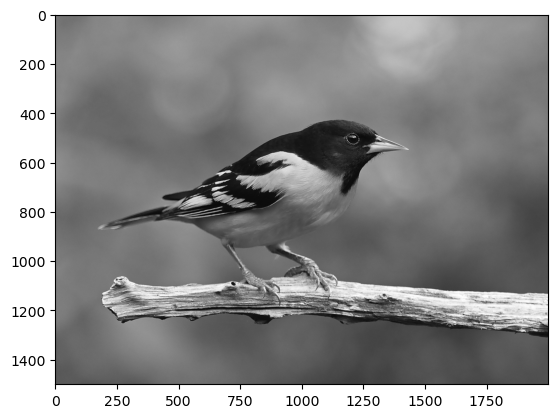

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print(a, b)
c = im1.astype(float)
im2 = 255 * (c - a) / (b - a)
im3 = Image.fromarray(im2)
# img.show()
# im3.show()
plt.imshow(im3)
plt.show()


### 1.6. Biến đổi Fourier

#### 1.6.1. Biến đổi ảnh với Fast Fourier

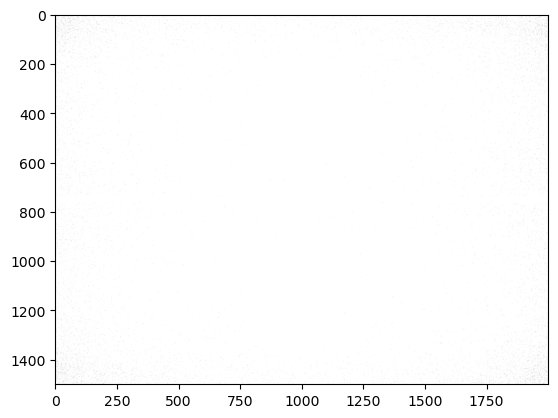

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)
# img.show()
# im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


#### 1.6.2. Lọc ảnh trong miền tần suất

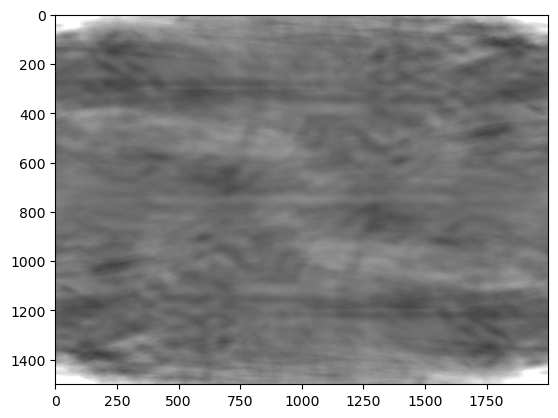

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)

H = H.astype(float)
H = Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

# img.show()
# im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


## 2.bài tập

### 1 Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh

Chọn phương pháp biến đổi ảnh:
I: Image Inverse Transformation
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching
Đang áp dụng: Log Transformation


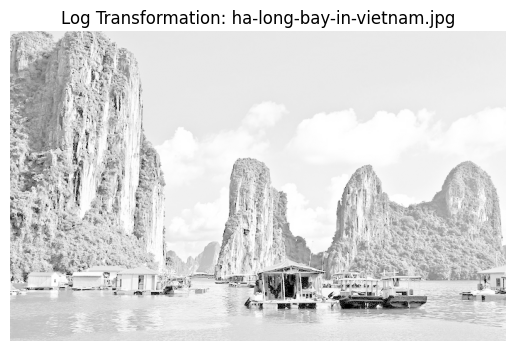

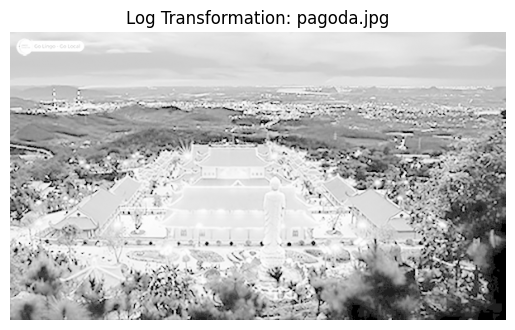

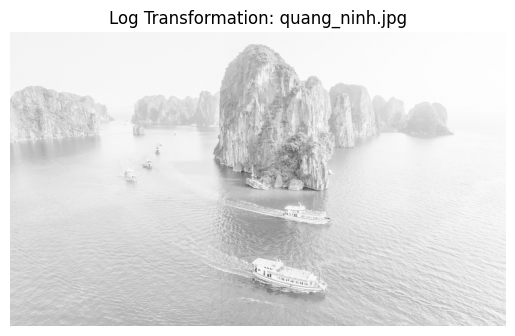

In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


output_dir = "output_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

# --- Các hàm xử lý ảnh ---
def inverse(img):
    return 255 - img

def gamma_correction(img, gamma=0.5):
    img_float = img.astype(np.float32) / 255.0
    corrected = np.power(img_float, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(log_img)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = 255 * (img.astype(np.float32) - a) / (b - a)
    return np.uint8(stretched)

# --- Map phím với hàm ---
operations = {
    'I': ('Image Inverse Transformation', inverse),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transformation', log_transform),
    'H': ('Histogram Equalization', histogram_equalization),
    'C': ('Contrast Stretching', contrast_stretching)
}

# --- Chương trình chính ---
def main():
    input_folder = "exercise"
    images, filenames = load_images_from_folder(input_folder)

    print("Chọn phương pháp biến đổi ảnh:")
    for key, (name, _) in operations.items():
        print(f"{key}: {name}")
    key = input("Nhập phím tương ứng (I, G, L, H, C): ").upper()

    if key in operations:
        name, func = operations[key]
        print(f"Đang áp dụng: {name}")
        for img, fname in zip(images, filenames):
            transformed = func(img)
            output_path = os.path.join(output_dir, f"{key}_{fname}")
            cv2.imwrite(output_path, transformed)
            plt.imshow(transformed, cmap='gray')
            plt.title(f"{name}: {fname}")
            plt.axis('off')
            plt.show()
    else:
        print("Phím không hợp lệ.")

if __name__ == "__main__":
    main()
